In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings

pd.options.mode.chained_assignment = None  # default='warn'
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/final.csv', encoding='latin-1')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/final.csv', encoding='latin-1')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1819 entries, 0 to 1818
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TypeCode                  1819 non-null   object 
 1   FreqCode                  1819 non-null   object 
 2   RefPeriodId               1819 non-null   int64  
 3   RefYear                   1819 non-null   int64  
 4   RefMonth                  1819 non-null   int64  
 5   Period                    1819 non-null   int64  
 6   ReporterCode              1819 non-null   int64  
 7   ReporterISO               1819 non-null   object 
 8   ReporterDesc              1819 non-null   object 
 9   FlowCode                  1819 non-null   object 
 10  FlowDesc                  1819 non-null   object 
 11  PartnerCode               1819 non-null   int64  
 12  PartnerISO                1819 non-null   object 
 13  PartnerDesc               1819 non-null   object 
 14  Partner2

In [ ]:
# Check for duplicates and dropping if any
df = df.drop_duplicates()

In [ ]:
df.shape

(1819, 47)

In [ ]:
# Drop unwanted columns
df = df.drop(['TypeCode', 'FreqCode', 'RefPeriodId', 'Period', 'ReporterCode', 'ReporterISO', 'FlowCode', 'FlowDesc', 'PartnerCode', 'PartnerISO',
              'Partner2Code', 'Partner2ISO', 'Partner2Desc', 'ClassificationCode', 'ClassificationSearchCode', 'AggrLevel', 'IsLeaf',
               'QtyUnitCode', 'QtyUnitAbbr', 'Qty', 'IsQtyEstimated', 'IsOriginalClassification', 'LegacyEstimationFlag', 'IsReported',
              'CustomsCode', 'CustomsDesc', 'MosCode', 'MotCode', 'MotDesc', 'GrossWgt', 'IsGrossWgtEstimated', 'Cifvalue', 'Fobvalue',
              'AltQtyUnitCode', 'AltQtyUnitAbbr', 'AltQty', 'IsAltQtyEstimated', 'IsNetWgtEstimated', 'IsAggregate'], axis=1)

In [ ]:
df.shape

(1819, 8)

In [ ]:
# Check for missing values
df.isnull().sum()

RefYear           0
RefMonth          0
ReporterDesc      0
PartnerDesc       0
CmdCode           0
CmdDesc           0
NetWgt          127
PrimaryValue      0
dtype: int64

In [ ]:
# Missing value percentage
null_percentages = (df.isna().sum() / len(df)) * 100
null_df = pd.DataFrame({'Column': null_percentages.index, 'Null Percentage': null_percentages.values})
null_df['Null Percentage'] = null_df['Null Percentage'].astype(int)
sorted_null_df = null_df.sort_values(by='Null Percentage', ascending=False)
sorted_null_df.head().style.background_gradient()

,Column,Null Percentage
6,NetWgt,6
0,RefYear,0
1,RefMonth,0
2,ReporterDesc,0
3,PartnerDesc,0


In [ ]:
# Dropping rows with missing values
df = df.dropna()

In [ ]:
#Dropping rows with zero values in Quantity column
df = df[df['NetWgt'] != 0]

In [ ]:
df.shape

(1408, 8)

In [ ]:
# Creating a new column 'PPKG' using the formula PPKG = PrimaryValue / NetWgt
df['PPKG'] = df['PrimaryValue'] / df['NetWgt']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1408 entries, 2 to 1818
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RefYear       1408 non-null   int64  
 1   RefMonth      1408 non-null   int64  
 2   ReporterDesc  1408 non-null   object 
 3   PartnerDesc   1408 non-null   object 
 4   CmdCode       1408 non-null   int64  
 5   CmdDesc       1408 non-null   object 
 6   NetWgt        1408 non-null   float64
 7   PrimaryValue  1408 non-null   float64
 8   PPKG          1408 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 110.0+ KB


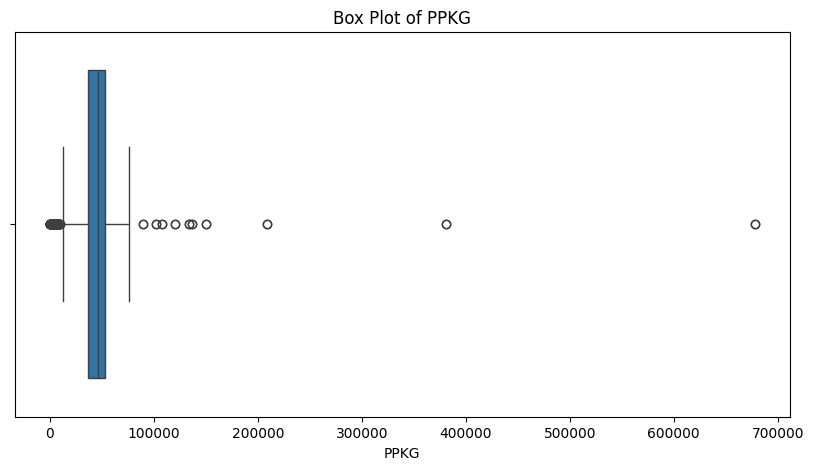

In [ ]:
# Visualize outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['PPKG'])
plt.title('Box Plot of PPKG')
plt.show()

In [ ]:
# Statistical analysis for outliers
Q1 = df['PPKG'].quantile(0.25)
Q3 = df['PPKG'].quantile(0.75)
IQR = Q3 - Q1

print('Q1:', Q1)
print('Q3:', Q3)
print('IQR:', IQR)

lower_bound = Q1 - 1.1 * IQR
upper_bound = Q3 + 1.1 * IQR

print('Lower Bound:', lower_bound)
print('Upper Bound:', upper_bound)


Q1: 36585.45019523563
Q3: 53263.87320143885
IQR: 16678.423006203222
Lower Bound: 18239.184888412085
Upper Bound: 71610.1385082624


In [ ]:
# Identify outliers
outliers = df[(df['PPKG'] < lower_bound) | (df['PPKG'] > upper_bound)]

# Print the outliers
print("Identified Outliers:")
print(outliers)

# Optional: Analyze impact
print("Outliers Statistics:")
print(outliers.describe())

Identified Outliers:
      RefYear  RefMonth             ReporterDesc           PartnerDesc  \
6        2017         1             South Africa               Namibia   
17       2017         2             South Africa               Namibia   
27       2017         3             South Africa               Namibia   
51       2017         6             South Africa               Namibia   
59       2017         7             South Africa               Namibia   
68       2017         8             South Africa               Namibia   
87       2017        10             South Africa               Namibia   
94       2017        11             South Africa                 World   
95       2017        11             South Africa               Namibia   
97       2017        11             South Africa               Namibia   
107      2017        12             South Africa               Namibia   
110      2018         1             South Africa               Namibia   
116      2018    

In [ ]:
# Removing outliers
df_no_outliers = df[(df['PPKG'] >= lower_bound) & (df['PPKG'] <= upper_bound)]

print("Data without outliers:")
print(df_no_outliers.describe())

Data without outliers:
           RefYear     RefMonth        CmdCode        NetWgt  PrimaryValue  \
count  1214.000000  1214.000000    1214.000000   1214.000000  1.214000e+03   
mean   2020.712521     6.477759  372871.925041   3199.704285  1.507223e+08   
std       1.644063     3.511247  351721.899460   4186.974393  2.041717e+08   
min    2017.000000     1.000000    7108.000000      0.009000  5.613600e+02   
25%    2019.000000     3.000000    7108.000000     39.340000  2.003303e+06   
50%    2021.000000     6.000000  710812.000000   1312.750000  6.060397e+07   
75%    2022.000000     9.750000  710812.000000   5491.730000  2.416818e+08   
max    2023.000000    12.000000  710813.000000  19314.300000  8.081395e+08   

               PPKG  
count   1214.000000  
mean   46653.527427  
std     9948.718218  
min    18314.223301  
25%    40024.898099  
50%    48326.945833  
75%    53696.372121  
max    68012.571429  


In [ ]:
# Basic statistics for the entire dataset
print(df_no_outliers.describe())

           RefYear     RefMonth        CmdCode        NetWgt  PrimaryValue  \
count  1214.000000  1214.000000    1214.000000   1214.000000  1.214000e+03   
mean   2020.712521     6.477759  372871.925041   3199.704285  1.507223e+08   
std       1.644063     3.511247  351721.899460   4186.974393  2.041717e+08   
min    2017.000000     1.000000    7108.000000      0.009000  5.613600e+02   
25%    2019.000000     3.000000    7108.000000     39.340000  2.003303e+06   
50%    2021.000000     6.000000  710812.000000   1312.750000  6.060397e+07   
75%    2022.000000     9.750000  710812.000000   5491.730000  2.416818e+08   
max    2023.000000    12.000000  710813.000000  19314.300000  8.081395e+08   

               PPKG  
count   1214.000000  
mean   46653.527427  
std     9948.718218  
min    18314.223301  
25%    40024.898099  
50%    48326.945833  
75%    53696.372121  
max    68012.571429  


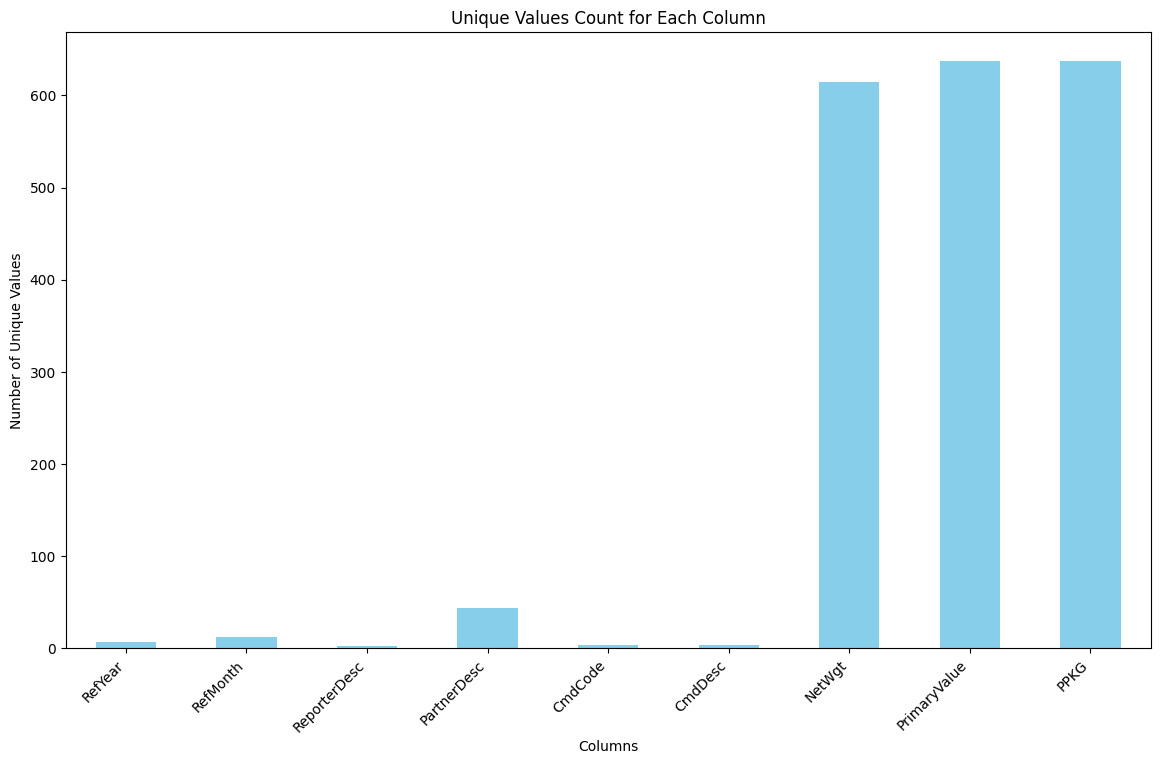

In [ ]:
# Calculate the number of unique values for each column
unique_counts = df_no_outliers.nunique()

# Create a bar plot
plt.figure(figsize=(14, 8))
unique_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.title('Unique Values Count for Each Column')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Create 'Date' column from 'RefYear' and 'RefMonth'
df_no_outliers['Date'] = pd.to_datetime(df_no_outliers['RefYear'].astype(str) + '-' + df_no_outliers['RefMonth'].astype(str) + '-01')
df_no_outliers = df_no_outliers.sort_values(by='Date')

# Set 'Date' as the index
df_no_outliers.set_index('Date', inplace=True)

# Filter the DataFrame to include only numeric columns
numeric_columns = df_no_outliers.select_dtypes(include=['number'])

# Group by the year-month combination and aggregate the values
monthly_aggregated = numeric_columns.resample('M').sum()

# Optionally, reset the index if you prefer to have 'Date' as a column again
monthly_aggregated.reset_index(inplace=True)

In [ ]:
# Filter data for South Africa and Tanzania
df_sa = df_no_outliers[df_no_outliers['ReporterDesc'] == 'South Africa'].copy()
df_tz = df_no_outliers[df_no_outliers['ReporterDesc'] == 'United Rep. of Tanzania'].copy()

# Descritive Analysis

In [ ]:
def descriptive_analysis(df, column_name, country):
    # Calculate descriptive statistics
    description = df[column_name].describe()
    print(f'Descriptive Analysis for {column_name} - {country}:')
    print(description)
    print('-----------------------------------')

# Perform descriptive analysis for NetWgt, PrimaryValue, and PPKG
descriptive_analysis(df_sa, 'NetWgt', 'South Africa')
descriptive_analysis(df_tz, 'NetWgt', 'Tanzania')
descriptive_analysis(df_sa, 'PrimaryValue', 'South Africa')
descriptive_analysis(df_tz, 'PrimaryValue', 'Tanzania')
descriptive_analysis(df_sa, 'PPKG', 'South Africa')
descriptive_analysis(df_tz, 'PPKG', 'Tanzania')

Descriptive Analysis for NetWgt - South Africa:
count      289.000000
mean      9210.593702
std       3613.085298
min          0.030000
25%       6953.050000
50%       9261.050000
75%      11860.630000
max      16143.600000
Name: NetWgt, dtype: float64
-----------------------------------
Descriptive Analysis for NetWgt - Tanzania:
count      925.000000
mean      1321.707483
std       2028.206656
min          0.009000
25%         12.540000
50%        704.330000
75%       1779.690000
max      19314.300000
Name: NetWgt, dtype: float64
-----------------------------------
Descriptive Analysis for PrimaryValue - South Africa:
count    2.890000e+02
mean     4.541111e+08
std      1.842510e+08
min      7.742290e+02
25%      3.624540e+08
50%      4.613816e+08
75%      5.686696e+08
max      8.081395e+08
Name: PrimaryValue, dtype: float64
-----------------------------------
Descriptive Analysis for PrimaryValue - Tanzania:
count    9.250000e+02
mean     5.593376e+07
std      7.974624e+07
min      

# Analyze the trend in quantity traded over time.

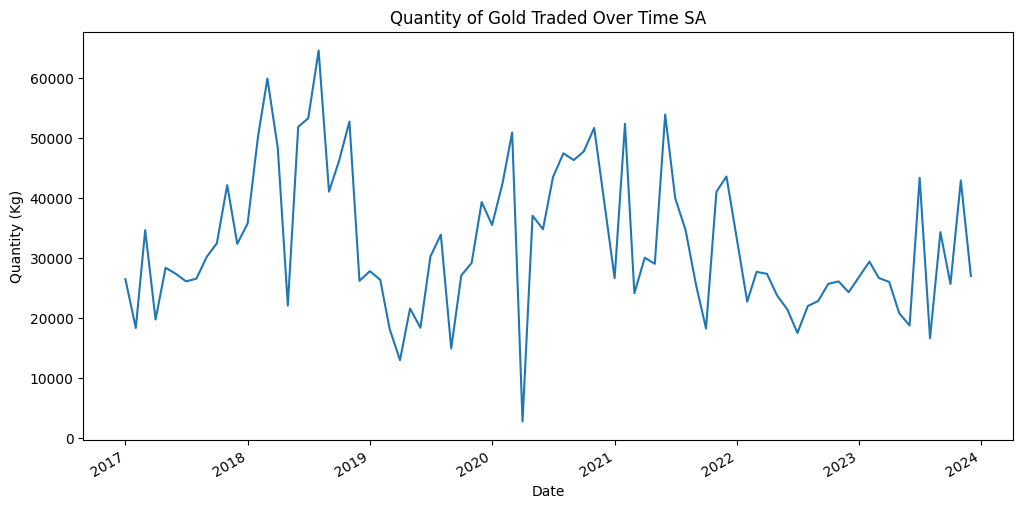

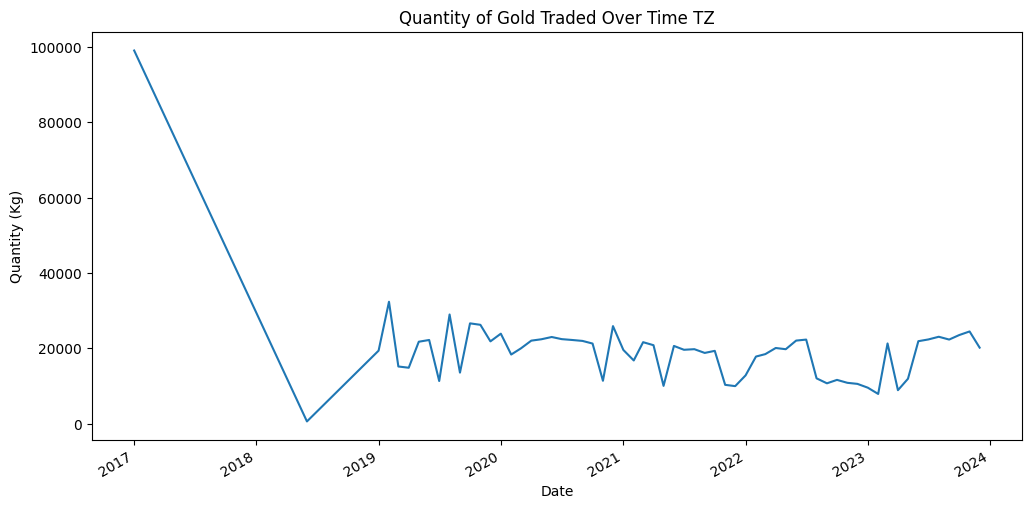

In [ ]:
import matplotlib.pyplot as plt


# Group by date and sum the quantities
qty_trend = df_sa.groupby('Date')['NetWgt'].sum()

# Plot the trend
plt.figure(figsize=(12, 6))
qty_trend.plot()
plt.title('Quantity of Gold Traded Over Time SA')
plt.xlabel('Date')
plt.ylabel('Quantity (Kg)')
plt.show()


# Group by date and sum the quantities
qty_trend = df_tz.groupby('Date')['NetWgt'].sum()

# Plot the trend
plt.figure(figsize=(12, 6))
qty_trend.plot()
plt.title('Quantity of Gold Traded Over Time TZ')
plt.xlabel('Date')
plt.ylabel('Quantity (Kg)')
plt.show()

# Analyze the price trend over time.

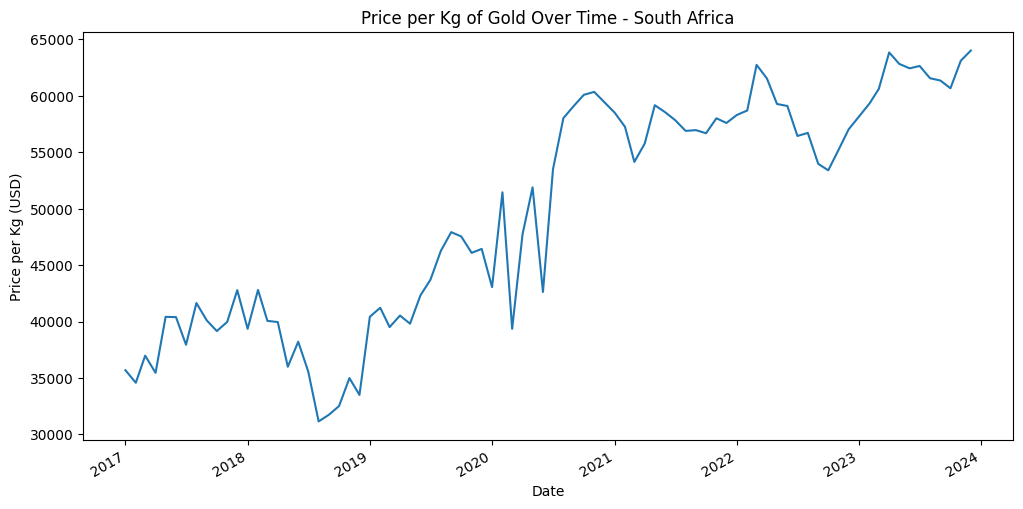

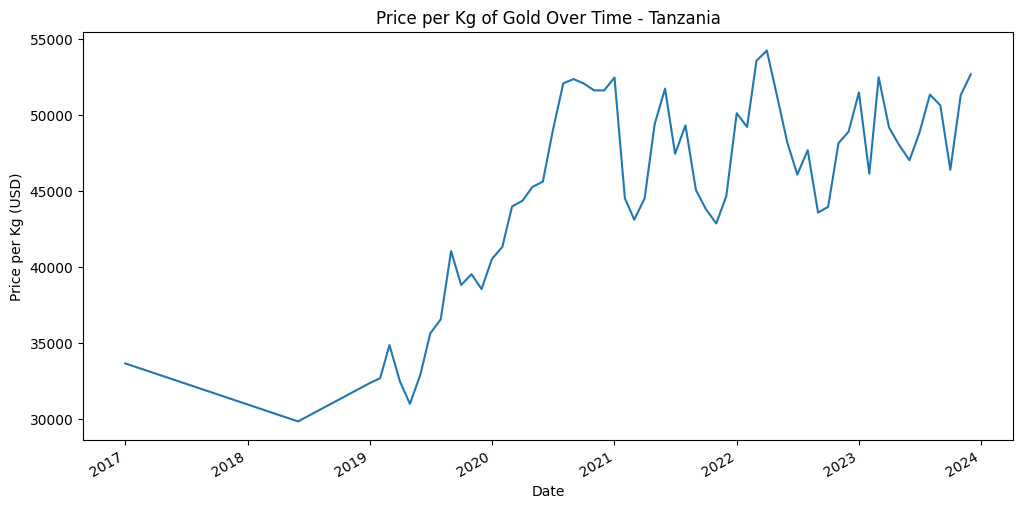

In [ ]:
def plot_price_trend(df, country):
    price_trend = df.groupby('Date')['PPKG'].mean()

    plt.figure(figsize=(12, 6))
    price_trend.plot()
    plt.title(f'Price per Kg of Gold Over Time - {country}')
    plt.xlabel('Date')
    plt.ylabel('Price per Kg (USD)')
    plt.show()

# Plot price trends for each country
plot_price_trend(df_sa, 'South Africa')
plot_price_trend(df_tz, 'Tanzania')

# Price by month

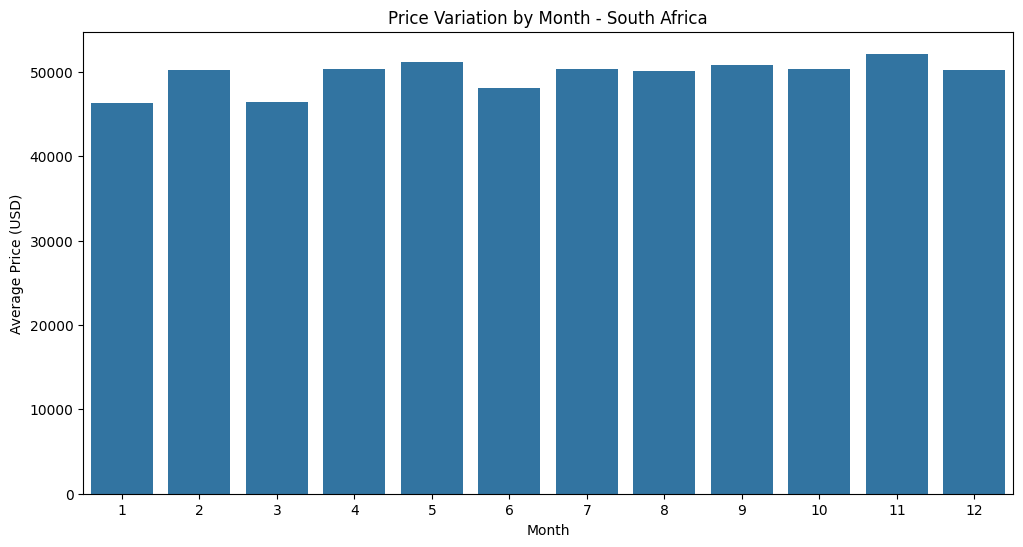

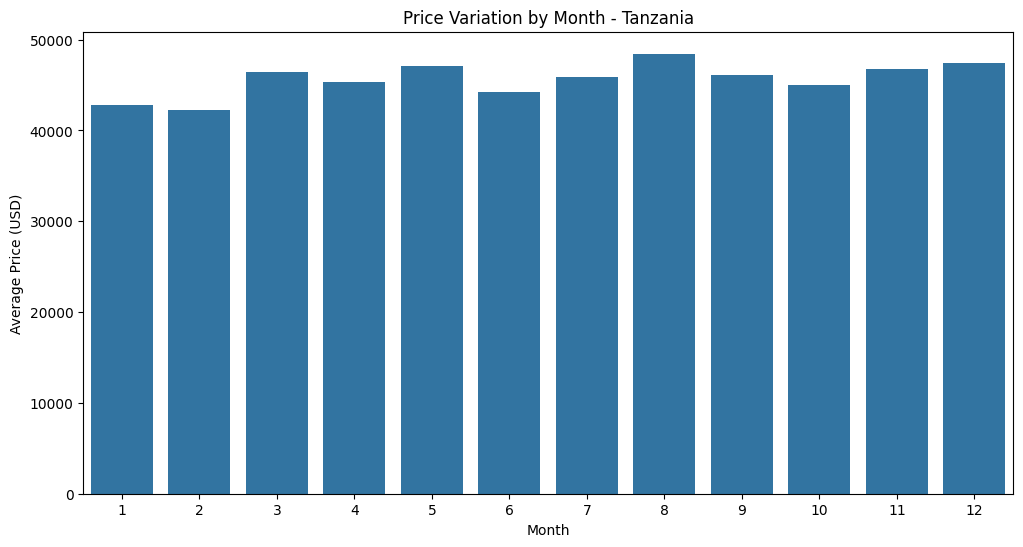

In [ ]:
def plot_price_by_month(df, country):
    price_by_month = df.groupby('RefMonth')['PPKG'].mean().reset_index()

    plt.figure(figsize=(12, 6))
    sns.barplot(x='RefMonth', y='PPKG', data=price_by_month)
    plt.title(f'Price Variation by Month - {country}')
    plt.xlabel('Month')
    plt.ylabel('Average Price (USD)')
    plt.show()

plot_price_by_month(df_sa, 'South Africa')
plot_price_by_month(df_tz, 'Tanzania')

# Plot no of Trades

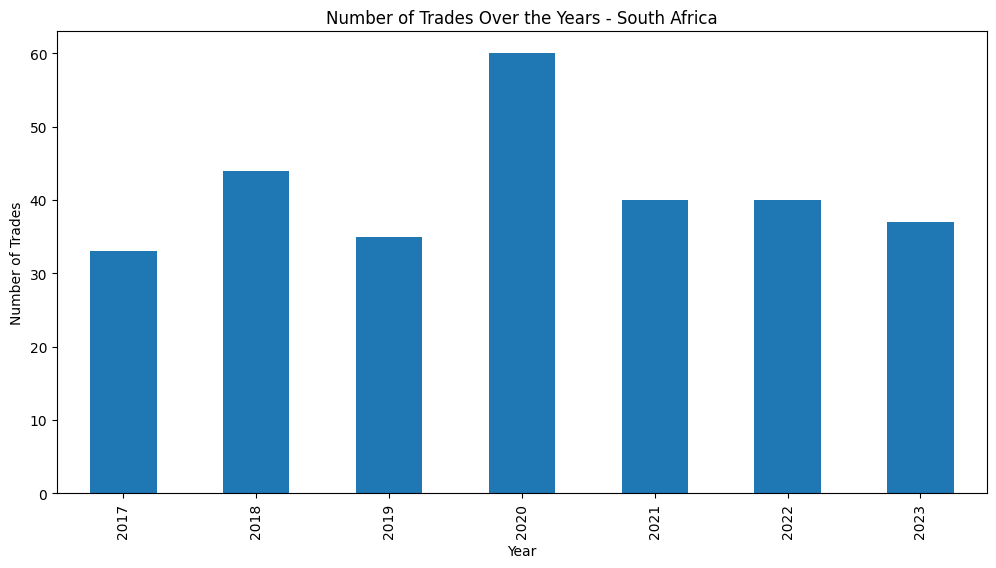

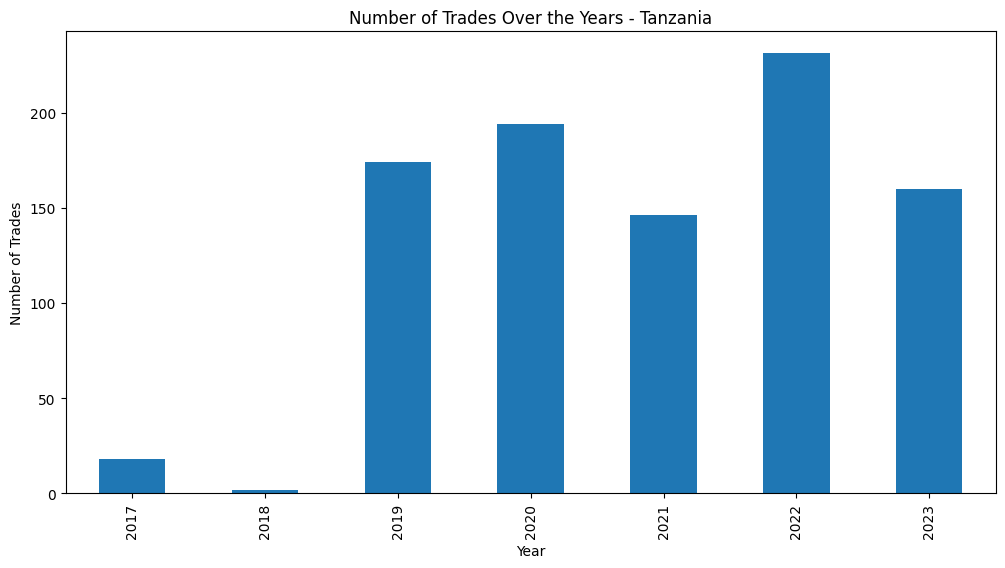

In [ ]:
def plot_no_of_trades(df, country):

    no_of_trades = df.groupby('RefYear').size()

    plt.figure(figsize=(12, 6))
    no_of_trades.plot(kind='bar')
    plt.title(f'Number of Trades Over the Years - {country}')
    plt.xlabel('Year')
    plt.ylabel('Number of Trades')
    plt.show()


plot_no_of_trades(df_sa, 'South Africa')
plot_no_of_trades(df_tz, 'Tanzania')

# Volume Copmarison of BRICKS Vs EU/UK/USA

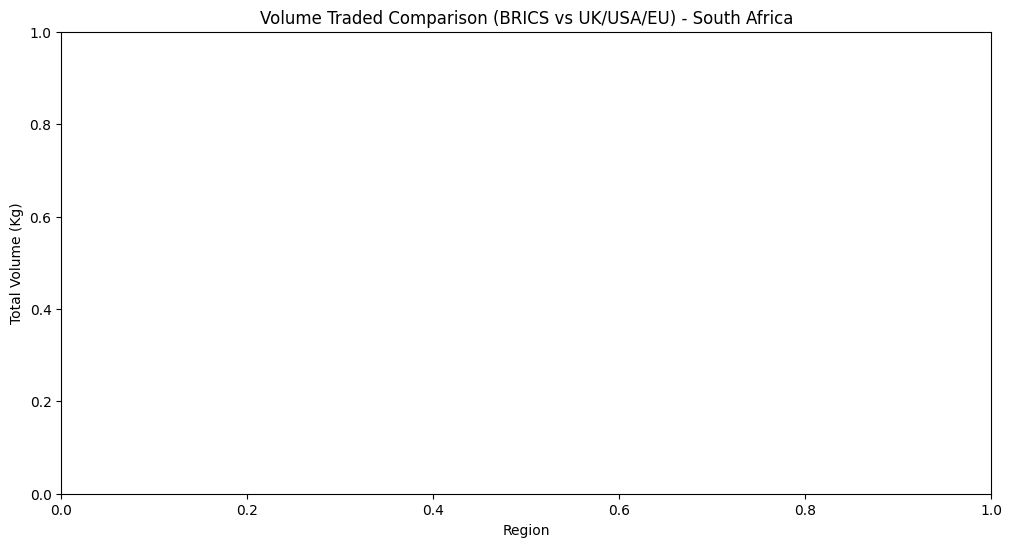

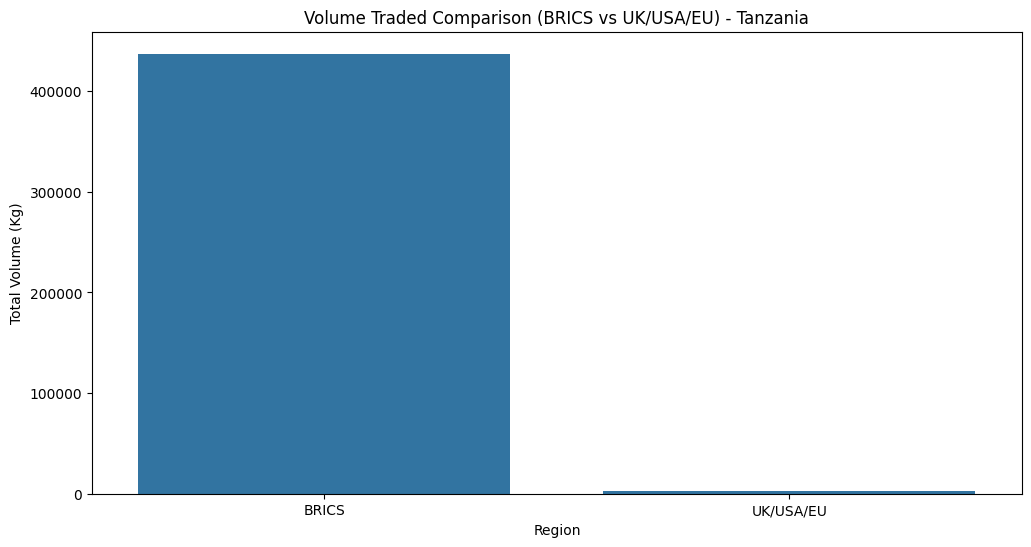

In [ ]:
def plot_volume_comparison(df, country):
    brics_countries = ['China', 'Russia', 'India', 'Brazil', 'South Africa']
    uk_usa_eu = ['United Kingdom', 'USA', 'Belgium', 'Germany', 'Denmark', 'Italy', 'Czechia', 'Spain', 'Netherlands']

    df['Region'] = df['PartnerDesc'].apply(lambda x: 'BRICS' if x in brics_countries else 'UK/USA/EU' if x in uk_usa_eu else 'Other')
    volume_by_region = df[df['Region'].isin(['BRICS', 'UK/USA/EU'])].groupby('Region')['NetWgt'].sum().reset_index()

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Region', y='NetWgt', data=volume_by_region)
    plt.title(f'Volume Traded Comparison (BRICS vs UK/USA/EU) - {country}')
    plt.xlabel('Region')
    plt.ylabel('Total Volume (Kg)')
    plt.show()

plot_volume_comparison(df_sa, 'South Africa')
plot_volume_comparison(df_tz, 'Tanzania')

# Check for correlation between volume and trade.

Correlation for South Africa:
                NetWgt  PrimaryValue
NetWgt        1.000000      0.840957
PrimaryValue  0.840957      1.000000


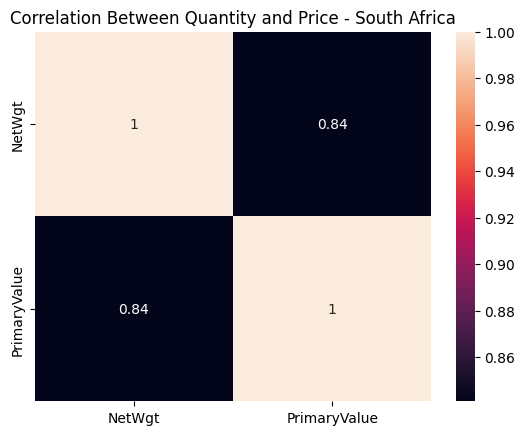

Correlation for Tanzania:
                NetWgt  PrimaryValue
NetWgt        1.000000      0.970856
PrimaryValue  0.970856      1.000000


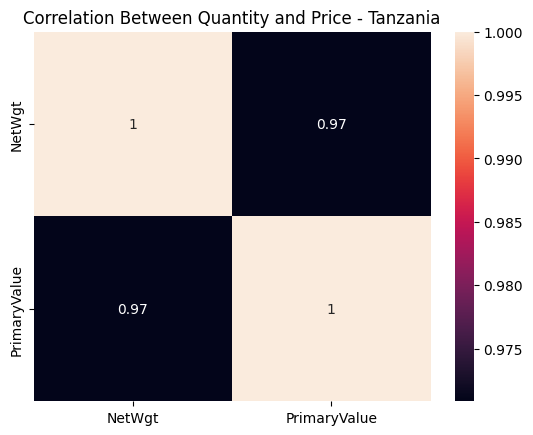

In [ ]:
import seaborn as sns

def plot_correlation(df, country):
    correlation = df[['NetWgt', 'PrimaryValue']].corr()
    print(f'Correlation for {country}:')
    print(correlation)

    sns.heatmap(correlation, annot=True)
    plt.title(f'Correlation Between Quantity and Price - {country}')
    plt.show()

# Plot correlations for each country
plot_correlation(df_sa, 'South Africa')
plot_correlation(df_tz, 'Tanzania')

# Trade Volume by Reporter

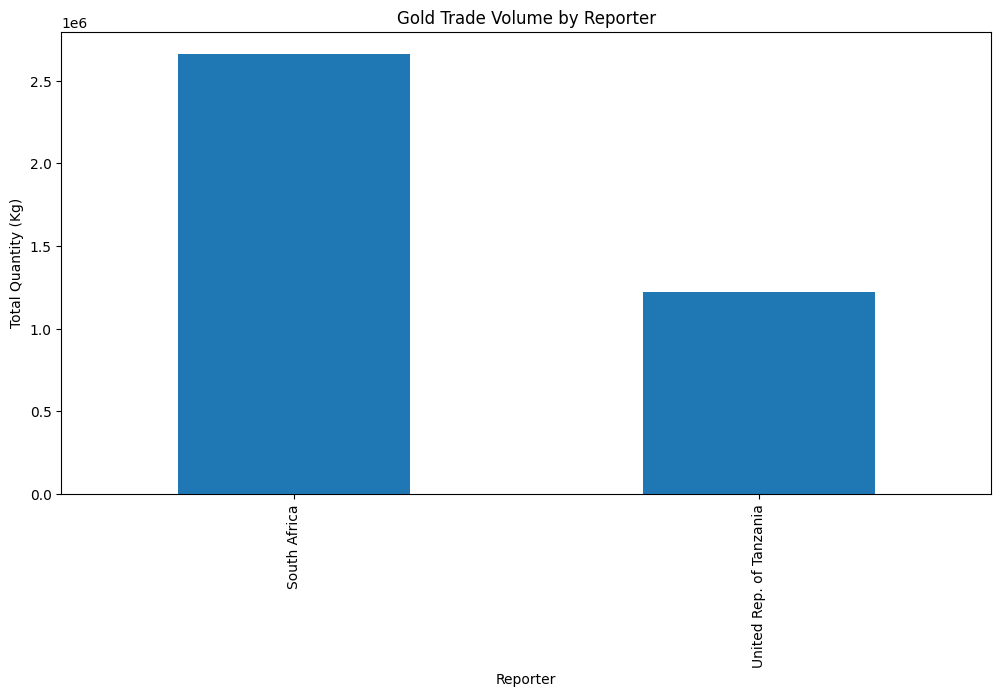

In [ ]:
reporter_volume = df_no_outliers.groupby('ReporterDesc')['NetWgt'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
reporter_volume.plot(kind='bar')
plt.title('Gold Trade Volume by Reporter')
plt.xlabel('Reporter')
plt.ylabel('Total Quantity (Kg)')
plt.show()

# Trade Volume by Partner

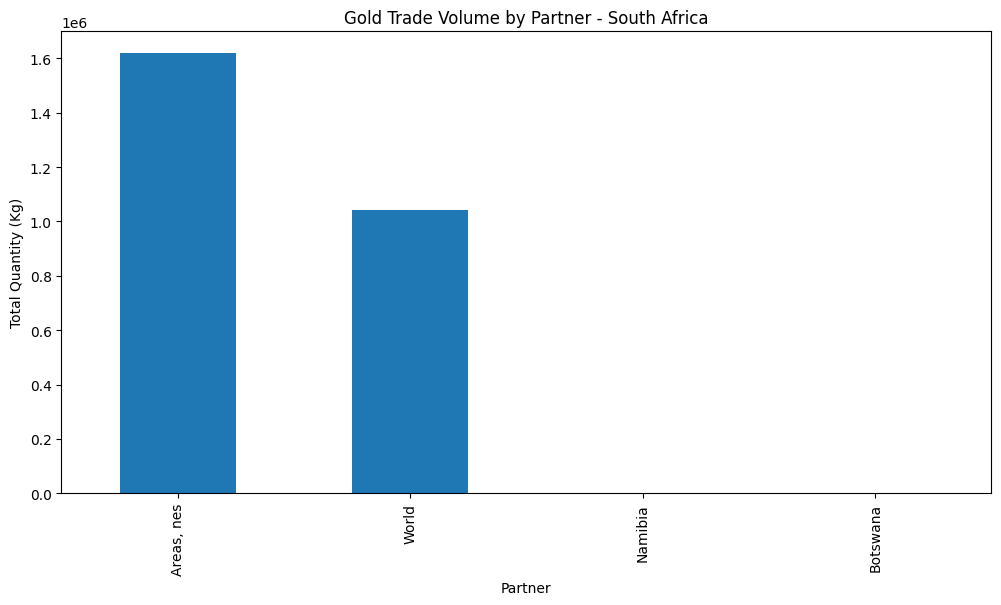

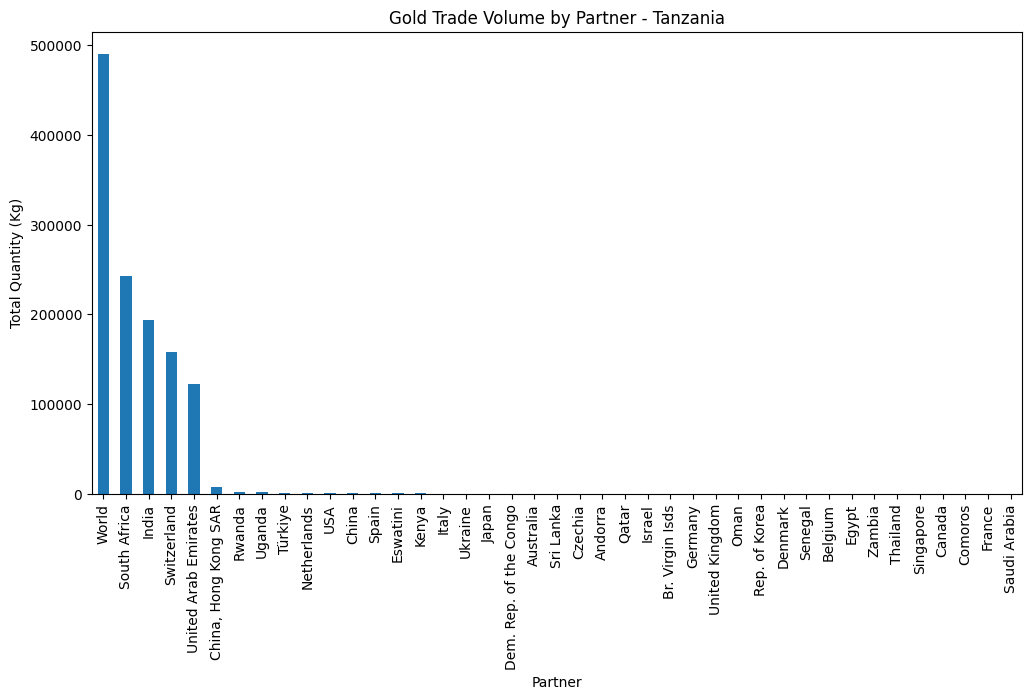

In [ ]:
def plot_partner_volume(df_no_outliers, country):
    partner_volume = df_no_outliers.groupby('PartnerDesc')['NetWgt'].sum().sort_values(ascending=False)

    plt.figure(figsize=(12, 6))
    partner_volume.plot(kind='bar')
    plt.title(f'Gold Trade Volume by Partner - {country}')
    plt.xlabel('Partner')
    plt.ylabel('Total Quantity (Kg)')
    plt.show()

# Plot trade volume by partner for each country
plot_partner_volume(df_sa, 'South Africa')
plot_partner_volume(df_tz, 'Tanzania')

In [ ]:
# Top Partners for South Africa
south_africa = data[data['ReporterDesc'] == 'South Africa']
top_partners = south_africa.groupby('PartnerDesc')['Qty'].sum().sort_values(ascending=False).head(10)
print(top_partners)

PartnerDesc
Areas, nes    2089717.16
World         1515328.16
Namibia           709.84
Botswana           10.32
Eswatini            0.00
Lesotho             0.00
Name: Qty, dtype: float64


In [ ]:
# Top Partners for United Rep. of Tanzania
tanzania = data[data['ReporterDesc'] == 'United Rep. of Tanzania']
top_partners = tanzania.groupby('PartnerDesc')['Qty'].sum().sort_values(ascending=False).head(10)
print(top_partners)

PartnerDesc
World                   185927.230
India                    91563.310
South Africa             76979.812
United Arab Emirates     47041.600
Switzerland              41201.554
Br. Virgin Isds          10215.106
China, Hong Kong SAR      4187.888
China                     1800.832
Netherlands                956.100
USA                        869.194
Name: Qty, dtype: float64


In [ ]:
top_products = df_sa.groupby('CmdCode')['NetWgt'].sum().sort_values(ascending=False).head(10)
print('"Top Products for South Africa"')
print(top_products)

"Top Products for South Africa"
CmdCode
710813    1435572.15
7108      1226289.43
Name: NetWgt, dtype: float64


In [ ]:
top_products = df_tz.groupby('CmdCode')['NetWgt'].sum().sort_values(ascending=False).head(10)
print('Top Products for United Rep. of Tanzania')
print(top_products)

Top Products for United Rep. of Tanzania
CmdCode
710812    612184.976
7108      607146.346
710813      3248.100
Name: NetWgt, dtype: float64


# Prediction Using ARIMA

In [ ]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1214 entries, 2017-01-01 to 2023-12-01
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RefYear       1214 non-null   int64  
 1   RefMonth      1214 non-null   int64  
 2   ReporterDesc  1214 non-null   object 
 3   PartnerDesc   1214 non-null   object 
 4   CmdCode       1214 non-null   int64  
 5   CmdDesc       1214 non-null   object 
 6   NetWgt        1214 non-null   float64
 7   PrimaryValue  1214 non-null   float64
 8   PPKG          1214 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 94.8+ KB


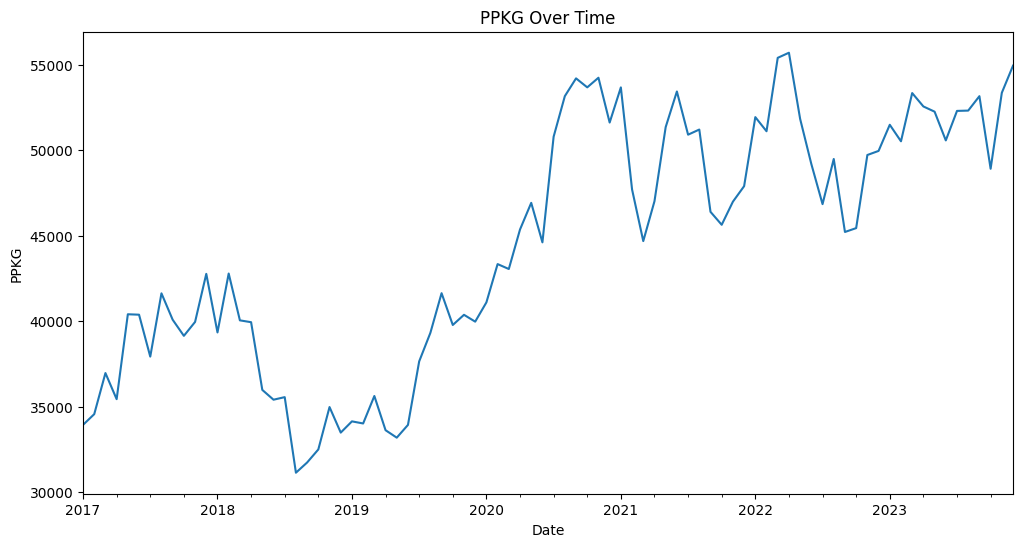

In [ ]:
# Group by date and PPKG
ppkg_trend = df_no_outliers.groupby('Date')['PPKG'].mean()

# Plot the trend
plt.figure(figsize=(12, 6))
ppkg_trend.plot()
plt.title('PPKG Over Time')
plt.xlabel('Date')
plt.ylabel('PPKG')
plt.show()

1214    54901.674006
1215    55617.552261
1216    55106.168981
Name: predicted_mean, dtype: float64


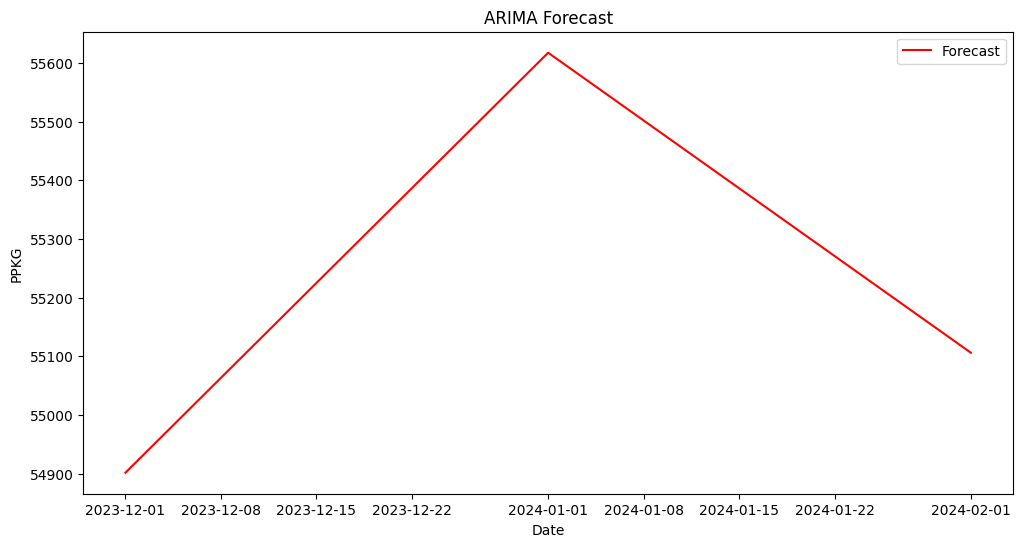

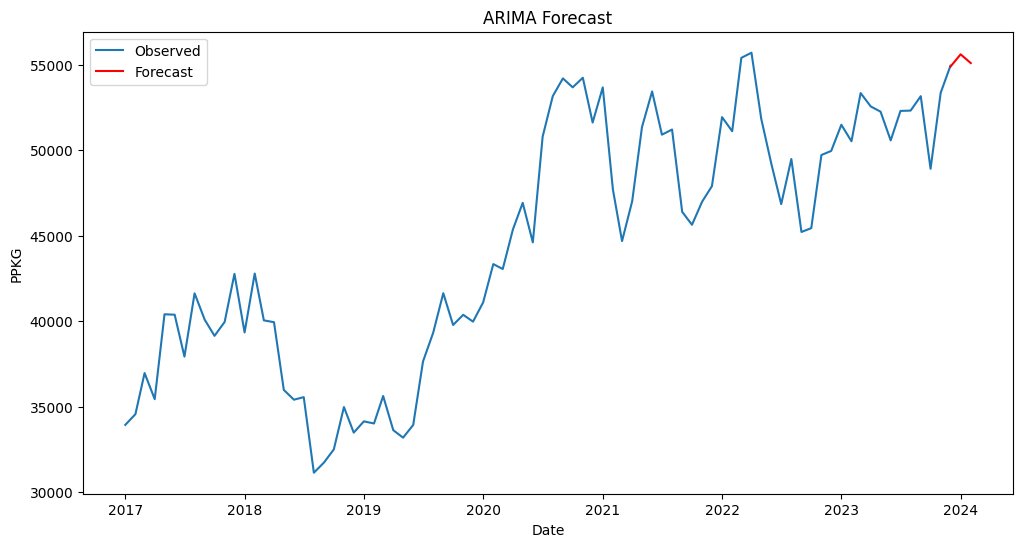

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Fit ARIMA model (use appropriate values for p, d, q)
p, d, q = 1, 1, 2  # These are example parameters, you should determine the best values based on your data
model = sm.tsa.ARIMA(df_no_outliers['PPKG'], order=(p, d, q))
model_fit = model.fit()


# Forecast future values
forecast = model_fit.forecast(steps=3)  # Forecast for the next 3 months
print(forecast)

# Plot the predicted results
plt.figure(figsize=(12, 6))
plt.plot(pd.date_range(start=df_no_outliers.index[-1], periods=3, freq='MS'), forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('PPKG')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

# Plot the predicted results with previous data
plt.figure(figsize=(12, 6))
plt.plot(df_no_outliers.groupby('Date')['PPKG'].mean(), label='Observed')
plt.plot(pd.date_range(start=df_no_outliers.index[-1], periods=3, freq='MS'), forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('PPKG')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()
